In [16]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plta
import numpy as np


In [17]:
data_path = "/home/kalyan/DataSets/YalFaceDataSet/data/"

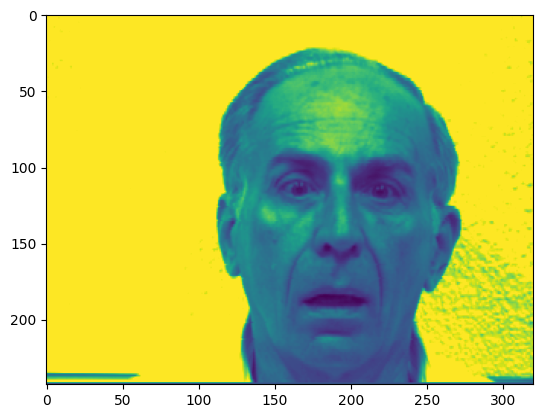

In [18]:
# Imports
from matplotlib import pyplot as plta
import numpy as np

filename = "/home/kalyan/DataSets/YalFaceDataSet/data/subject05.surprised"
pixels = plta.imread(filename)

rgb_pixels = np.stack((pixels, pixels, pixels))
plta.imshow(pixels)
plta.show()

In [19]:
#setting labesl for the images based on file names
def get_labels(path):
    labels = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            labels.append(filename.split(".")[0])
    return labels

labels = get_labels(data_path)
print(labels)
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)
print((labels))

['subject09', 'subject12', 'subject15', 'subject14', 'subject03', 'subject06', 'subject07', 'subject09', 'subject02', 'subject14', 'subject06', 'subject03', 'subject10', 'subject02', 'subject03', 'subject02', 'subject05', 'subject10', 'subject14', 'subject07', 'subject09', 'subject11', 'subject07', 'subject04', 'subject11', 'subject11', 'subject05', 'subject11', 'subject03', 'subject03', 'subject13', 'subject15', 'subject11', 'subject10', 'subject03', 'subject15', 'subject02', 'subject05', 'subject13', 'subject09', 'subject14', 'subject10', 'subject09', 'subject08', 'subject07', 'subject07', 'subject01', 'subject01', 'subject12', 'subject12', 'subject12', 'subject12', 'subject07', 'subject04', 'subject01', 'subject12', 'subject02', 'subject01', 'subject04', 'subject06', 'subject03', 'subject15', 'subject06', 'subject02', 'subject08', 'subject09', 'subject02', 'subject08', 'subject15', 'subject01', 'subject06', 'subject06', 'subject10', 'subject11', 'subject15', 'subject14', 'subject06'

In [20]:
def read_image(path):
    pixels = plta.imread(path)
    rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
    return rgb_pixels

images = []
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        images.append(os.path.join(dirname, filename))

print(len(images))

165


In [21]:
#Apply FFT for all the images
def apply_fft(image):
    fft_image = np.fft.fftn(image)
    fft_image = np.fft.fftshift(fft_image)
    return fft_image
fft_images = []
for image in images:
    fft_images.append(apply_fft(read_image(image)))
    

In [22]:
fft_images = np.array(fft_images)

In [23]:
#flatten the images
fft_images = fft_images.reshape(fft_images.shape[0], -1)
print(fft_images.shape)

(165, 233280)


In [24]:
#getting eigen vectors
def get_eigen_vectors(data):
    mean = np.mean(data, axis=0)
    data = data - mean
    cov = np.cov(data)
    eigen_values, eigen_vectors = np.linalg.eig(cov)
    return eigen_values, eigen_vectors

eigen_values, eigen_vectors = get_eigen_vectors(fft_images)

In [25]:
#doing pca on the eigen vectors
def pca(eigen_vectors, eigen_values, n_components):
    eigen_vectors = eigen_vectors[:, :n_components]
    eigen_values = eigen_values[:n_components]
    return eigen_vectors, eigen_values

n_components = 100
eigen_vectors, eigen_values = pca(eigen_vectors, eigen_values, n_components)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
eigen_vectors =  np.real(eigen_vectors) #taking only real part of the eigen vectors

In [28]:
X_train, X_test, y_train, y_test = train_test_split(eigen_vectors, labels, test_size=0.2, random_state=42)


In [29]:
#LinearSVC
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of LinearSVC is: ", accuracy_score(y_test, y_pred))

Accuracy of LinearSVC is:  0.8181818181818182
